### The notebook showing how to use osmnx https://github.com/gboeing/osmnx to caculate distance between two location. There are 3 examples used in Sydney Metro area
### Details of the osmnx paper could be found here http://geoffboeing.com/publications/osmnx-complex-street-networks/

In [68]:
import osmnx as ox, networkx as nx, pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)
police_speed = 60*1000/60 # meters/mins

In [69]:
#create OSM graph for sydney
#G = ox.graph_from_place('Sydney, NSW,Australia', network_type='drive')
#ox.plot_graph(ox.project_graph(G))

In [70]:
#Sydney CBD  as location and Create a networkx graph from OSM data within some distance of some (lat, lon) center point.
import time
start_time = time.time()

location_point = -33.873195,151.208653
G = ox.graph_from_point(location_point, distance=30000, distance_type='network', network_type='drive')
print("--- %s seconds ---" % (time.time() - start_time))


--- 102.69366717338562 seconds ---


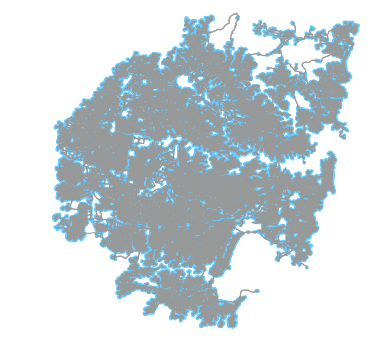

In [71]:
#greater sydney area with
fig, ax = ox.plot_graph(G)

### Coogee to City

In [72]:
# define origin/desination points then get the nodes nearest to each
#coogee
origin_point = (-33.923216,151.256322)
#city
destination_point = (-33.869044,151.209458)
origin_node = ox.get_nearest_node(G, origin_point)
destination_node = ox.get_nearest_node(G, destination_point)
origin_node, destination_node

(1822130563, 26526387)

In [73]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, origin_node, destination_node, weight='length')
#route

In [74]:
# inspect the first node in the route
G.node[route[0]]

{'osmid': 1822130563, 'x': 151.2562522, 'y': -33.9233679}

http://www.openstreetmap.org/node/1822130563

In [75]:
# inspect the first edge in the route
G.edges[(route[0],route[1],0)]

{'highway': 'residential',
 'length': 118.51296138061355,
 'maxspeed': '50',
 'name': 'Waltham Street',
 'oneway': False,
 'osmid': 22926355}

In [76]:
# what is the first edge's length
#G.edge[route[0]][route[1]][0]['length']
G.edges[(route[0],route[1],0)]['length']

118.51296138061355

In [77]:
# what is the total length of the route?
distance=nx.shortest_path_length(G, origin_node, destination_node, weight='length')
distance

9165.07619602186

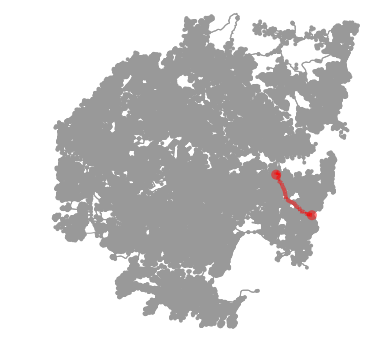

In [78]:
# plot it
fig, ax = ox.plot_graph_route(G, route)

In [79]:
# the time used 
print('It will take {:f} mins using police car'.format(distance/police_speed))

It will take 9.165076 mins using police car


### WastonBay to Manly

In [80]:
# define origin/desination points then get the nodes nearest to each
#WastonBay
origin_point = (-33.839497, 151.279895)
#Manly
destination_point = (-33.799175, 151.289173)
origin_node = ox.get_nearest_node(G, origin_point)
destination_node = ox.get_nearest_node(G, destination_point)
origin_node, destination_node

(14296335, 1849153351)

In [81]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, origin_node, destination_node, weight='length')
#route

In [82]:
# inspect the first node in the route
G.node[route[0]]

{'osmid': 14296335, 'x': 151.2795912, 'y': -33.8398494}

http://www.openstreetmap.org/node/14296335

In [83]:
# inspect the first edge in the route
G.edges[(route[0],route[1],0)]

{'geometry': <shapely.geometry.linestring.LineString at 0x1e9f6584e10>,
 'highway': 'residential',
 'length': 255.70583862991523,
 'name': ['Cliff Street', 'Victoria Street'],
 'oneway': True,
 'osmid': [3008795, 30061959]}

In [84]:
# what is the total length of the route?
distance=nx.shortest_path_length(G, origin_node, destination_node, weight='length')
distance

26066.5569436732

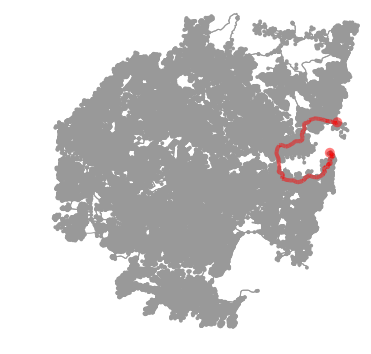

In [85]:
# plot it
fig, ax = ox.plot_graph_route(G, route)

In [86]:
# the time used 
print('It will take {:f} mins using police car'.format(distance/police_speed))

It will take 26.066557 mins using police car


### City to Parramatta

In [87]:
# define origin/desination points then get the nodes nearest to each
#city
origin_point = (-33.869044,151.209458)
#Parramatta
destination_point = (-33.817170, 150.999012)
origin_node = ox.get_nearest_node(G, origin_point)
destination_node = ox.get_nearest_node(G, destination_point)
origin_node, destination_node

(26526387, 52029050)

In [88]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, origin_node, destination_node, weight='length')
#route

In [89]:
# inspect the first node in the route
G.node[route[0]]

{'osmid': 26526387, 'x': 151.2096778, 'y': -33.8690813}

http://www.openstreetmap.org/node/26526387

In [90]:
# inspect the first edge in the route
G.edges[(route[0],route[1],0)]

{'geometry': <shapely.geometry.linestring.LineString at 0x1e9bcdf7978>,
 'highway': 'unclassified',
 'lanes': ['4', '3'],
 'length': 185.2869504726057,
 'maxspeed': '40',
 'name': 'Castlereagh Street',
 'oneway': True,
 'osmid': [408468005, 4354653]}

In [91]:
# what is the total length of the route?
distance=nx.shortest_path_length(G, origin_node, destination_node, weight='length')
distance

23385.303173198718

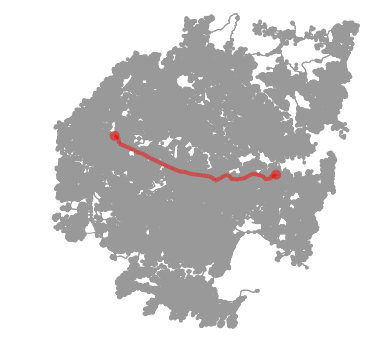

In [92]:
# plot it
fig, ax = ox.plot_graph_route(G, route)

In [93]:
# the time used 
print('It will take {:f} mins using police car'.format(distance/police_speed))

It will take 23.385303 mins using police car
